# Task:

- access each protein in Prediction Scores Table with 1500 Proteins in UniProt code
- Create new table with:
    - UniProt entry protein
    - Predicted class - High confidence Substrate ...
    - Analysed Sequence merged = JMD_C, TMD, JMD_N = SSKFWQKFKWFJWQMNFWQLWLCAKEPGMA = around 40 AAs


### Download the ESM1b data
- downloaded from: https://huggingface.co/spaces/ntranoslab/esm_variants/tree/main
- stored in '/Users/doma/Documents/Bachelor_Arbeit/Code/1.Task_BA/ALL_hum_isoforms_ESM1b_LLR'

### Check if all proteins from CPP Analysis in ESM1b_LLRs
- in 000_uniprot_df.csv all ESM1b proteins
- in 

In [8]:
%pip install src

  Using cached src-0.0.7.zip (6.3 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for src (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [71 lines of output]
      /private/var/folders/kw/jxgfh6fx7_v_5_3hk6sqf3nw0000gn/T/pip-build-env-xo8mo3ey/overlay/lib/python3.12/site-packages/setuptools/_distutils/dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running bdist_wheel
      running build
      running build_py
      creating build/lib/src
      copying src/__init__.py -> build/lib/src
      running egg_info
      writing src.egg-info/PKG-INFO
      writing dependency_links to src.egg-info/dependency_links.txt
      writing requirements to src.egg-info/requires.txt
      writing top-level names to src.egg-info/top_level.txt
      reading manifest file 'src.egg-info

In [9]:

import os  # Only if file operations are needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm
#import src.utils as utils

print(os.getcwd())  # Check current working directory
os.chdir('/Users/doma/Documents/Bachelor_Arbeit/Code') # Change to the directory where the code is located
print(os.getcwd())  # Confirm it changed


/Users/doma/Documents/Bachelor_Arbeit/Code/notebooks
/Users/doma/Documents/Bachelor_Arbeit/Code


In [10]:

print(os.getcwd())


/Users/doma/Documents/Bachelor_Arbeit/Code


In [11]:

os.chdir('/Users/doma/Documents/Bachelor_Arbeit/Code')
print(os.getcwd())  # Confirm it changed


/Users/doma/Documents/Bachelor_Arbeit/Code


In [12]:
# Load the CPP Profile Predicted 1500 proteins .csv
df_predicted = pd.read_csv('/Users/doma/Documents/Bachelor_Arbeit/Code/data/processed/Human_N_Out_Proteome.csv')
df_predicted['entry'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1534 entries, 0 to 1533
Series name: entry
Non-Null Count  Dtype 
--------------  ----- 
1534 non-null   object
dtypes: object(1)
memory usage: 12.1+ KB


In [13]:
df_esm1 = pd.read_csv('/Users/doma/Documents/Bachelor_Arbeit/Code/data/raw/000_uniprot_df.csv')

In [14]:
# Check if all 'entry' in df_predicted are also in df_esm1['id']
mask = df_predicted['entry'].isin(df_esm1['id'])     # returns boolean series - true if it's in there false if not
missing_entries = df_predicted[~mask]    # ~ inverts = True ==> False - gives you the rows with NOT
print(missing_entries['entry'].tolist())

['P0DSE2']


In [15]:
# Check whether a specific protein is in the folder (pathway)

protein_pathway_esm = '/Users/doma/Documents/Bachelor_Arbeit/Code/data/raw/ALL_hum_isoforms_ESM1b_LLR'
missing_proteins_esm = []
for entry in df_predicted['entry']:
    protein_pathway = os.path.join(protein_pathway_esm, entry + '_LLR.csv')    # Use os.path.isfile(path) returns True if file exists
                                   
    if not os.path.isfile(protein_pathway):
        missing_proteins_esm.append(entry)

    
# Report result
if missing_proteins_esm:
    print(f"⚠️ {len(missing_proteins_esm)} entries are missing corresponding CSV files:")
    print(missing_proteins_esm)

    # Save missing entries in 
    missing_proteins_esm_df = pd.DataFrame(missing_proteins_esm, columns=['missing_entry'])
    #missing_proteins_esm_df.to_csv('/Users/doma/Documents/Bachelor_Arbeit/Code/1.Task_BA/missing_entries_esm1.csv')
    utils.save_csv_no_overwrite(missing_proteins_esm_df, '/Users/doma/Documents/Bachelor_Arbeit/Code/results/csv/1.Task_Alpha_ESM/missing_entries_esm1.csv')

else:
    print("✅ All entries have matching .csv files.")

⚠️ 6 entries are missing corresponding CSV files:
['P0DSE2', 'Q92813', 'P49895', 'Q9BQE4', 'Q9Y6D0', 'P62341']


NameError: name 'utils' is not defined

# Out of 1534 proteins only 1 are missing

In [34]:
# Keep only the entries that exist in df_esm1
df_predicted_filtered = df_predicted[~df_predicted['entry'].isin(missing_proteins_esm)].copy()
print(f"Number of proteins in df_predicted that are also in esm1b dataset is: \033[1m{len(df_predicted_filtered)}\033[0m") 
# only 1528 proteins

Number of proteins in df_predicted that are also in esm1b dataset is: 1528


### Access all 1528 'entry' in the file
- '/Users/doma/Documents/Bachelor_Arbeit/Code/1.Task_BA/ALL_hum_isoforms_ESM1b_LLR'

### Define function that take df as input, calculates sum/average/max_pooling ... over 20 rows with variants
- first row = amino acid and its position 'M 1', 'R 2', ...
- 1 - 20. row are variants
  


In [36]:
entry = 'P05067'
#for entry in df_predicted_filtered['entry']:
pathway = '/Users/doma/Documents/Bachelor_Arbeit/Code/data/raw/ALL_hum_isoforms_ESM1b_LLR/' + entry + '_LLR.csv'
esm_LLR = pd.read_csv(pathway)

mean_esm_LLRs = esm_LLR.iloc[:, 1:].mean() 
mean_esm_LLRs 

M 1     -10.64920
L 2      -6.11100
P 3      -6.20145
G 4      -5.08575
L 5      -6.33630
           ...   
E 766   -16.39425
Q 767   -14.97635
M 768   -13.63545
Q 769   -14.08830
N 770   -13.55420
Length: 770, dtype: float64

In [39]:
# Define the storage pathway
store_pathway = '/Users/doma/Documents/Bachelor_Arbeit/Code/data/processed/ESM_mean_csv'

# Ensure the directory exists
os.makedirs(store_pathway, exist_ok=True)

# Base path for raw data
base_path = '/Users/doma/Documents/Bachelor_Arbeit/Code/data/raw/ALL_hum_isoforms_ESM1b_LLR/'

# Dictionary to store mean LLR scores per residue for every protein
protein_data = {}

# Iterate through the entries in the DataFrame
for entry in df_predicted_filtered['entry']:
    filepath = os.path.join(base_path, f'{entry}_LLR.csv')
    esm_LLR = pd.read_csv(filepath)
    mean_esm_LLRs = esm_LLR.iloc[:, 1:].mean()

    df_mean = mean_esm_LLRs.reset_index()
    df_mean.columns = ['residue', 'LLR_score']
    df_mean[['amino_acid', 'position']] = df_mean['residue'].str.split(' ', expand=True)
    df_mean['position'] = df_mean['position'].astype(int)
    df_mean = df_mean[['amino_acid', 'position', 'LLR_score']]

    # Store the DataFrame in the dictionary
    protein_data[entry] = df_mean

    # Save the DataFrame as a CSV file in the specified folder
    output_filepath = os.path.join(store_pathway, f'{entry}_mean_LLR.csv')
    df_mean.to_csv(output_filepath, index=False)

In [40]:
protein_data

{'P16150':     amino_acid  position  LLR_score
 0            M         1  -10.52780
 1            A         2   -3.68075
 2            T         3   -3.80965
 3            L         4   -6.54340
 4            L         5   -7.49545
 ..         ...       ...        ...
 395          D       396   -5.20995
 396          G       397   -5.41885
 397          A       398   -5.63840
 398          A       399   -5.40200
 399          P       400   -5.79840
 
 [400 rows x 3 columns],
 'P28827':      amino_acid  position  LLR_score
 0             M         1   -9.29580
 1             R         2   -4.65035
 2             G         3   -4.49095
 3             L         4   -5.46940
 4             G         5   -4.58845
 ...         ...       ...        ...
 1447          Y      1448  -10.28815
 1448          L      1449  -11.37190
 1449          N      1450   -6.30555
 1450          S      1451  -10.29275
 1451          G      1452   -3.11430
 
 [1452 rows x 3 columns],
 'P10586':      amino_aci

### Access the transmembrane domains in df_predicted_filtered


In [10]:
### Access the transmembrane domains in df_predicted_filtered
df_predicted_filtered[df_predicted_filtered['entry'] == 'P05067'].iloc[0]

entry                                                              P05067
name                                                             A4_HUMAN
gene_name                                                             APP
PRED_MEAN [%]                                                        93.4
PRED_STD [%]                                                         2.54
organism                                                            HUMAN
dataset                                                         SUBEXPERT
class                                                            SS_TYPE1
pred_class                                                   HC substrate
new_hc_substrate                                                        0
substrate_homolog                                                       1
human_n-out_proteome                                                    1
topology                                                            N-out
subcellular_location    Cytoplasm;ER;E

### Graph for single protein

### to access the specific position values like jmd-n tmd jmd-c 
- to find exact position of first AA of TMD
    - len_signal_pep + len_top_n + 1 = 17 + 684 + 1 = 702 residue position in APP is the first residue of TMD
      

In [11]:
# positions of the first residue of TMD

position_1_TMD = df_predicted_filtered['len_signal_pep'] + df_predicted_filtered['len_top_n'] + 1
position_1_TMD

0        254
1        743
2       1264
3        430
4        548
        ... 
1529     819
1530     376
1531     581
1532      38
1533      17
Length: 1528, dtype: int64

In [12]:
# Compute values for plot

# Choose a protein ID
entry = 'P05067'
df = protein_data[entry].copy()
df['position'] = df['position'].astype(int)


###
# Get the row corresponding to the entry
row = df_predicted_filtered.loc[df_predicted_filtered['entry'] == entry].squeeze()

# Compute TMD region
TMD_start = row['len_signal_pep'] + row['len_top_n'] + 1
TMD_end = TMD_start + row['len_tmd'] - 1

# Compute JMD-n and JMD-c regions length = probably always just 10 residues
len_jmd_n = len(str(row['jmd_n'])) 
len_jmd_c = len(str(row['jmd_c'])) 

# compute JMD-N TMD JMD-C region
highlight_start = TMD_start - len_jmd_n
highlight_end = TMD_end + len_jmd_c

In [13]:
# for the cleavage region part experimenting
highlight_start = row['len_signal_pep'] + row['len_top_n'] + 14
highlight_end = highlight_start + 10
    

In [14]:
# Plot
import matplotlib.pyplot as plt

# Min-max normalization of LLR_score
llr_min = df['LLR_score'].min()
llr_max = df['LLR_score'].max()
df['LLR_score_normalized'] = (df['LLR_score'] - llr_min) / (llr_max - llr_min)




# Compute rolling average
df['smoothed_LLR'] = df['LLR_score_normalized'].rolling(window=1, center=True).mean()
df['neg_smoothed_LLR'] = 1 - df['smoothed_LLR']  # optional, depending on what you want to emphasize


# Boolean mask for highlight range
highlight_mask = (df['position'] >= highlight_start) & (df['position'] <= highlight_end)

print(highlight_mask)

0      False
1      False
2      False
3      False
4      False
       ...  
765    False
766    False
767    False
768    False
769    False
Name: position, Length: 770, dtype: bool


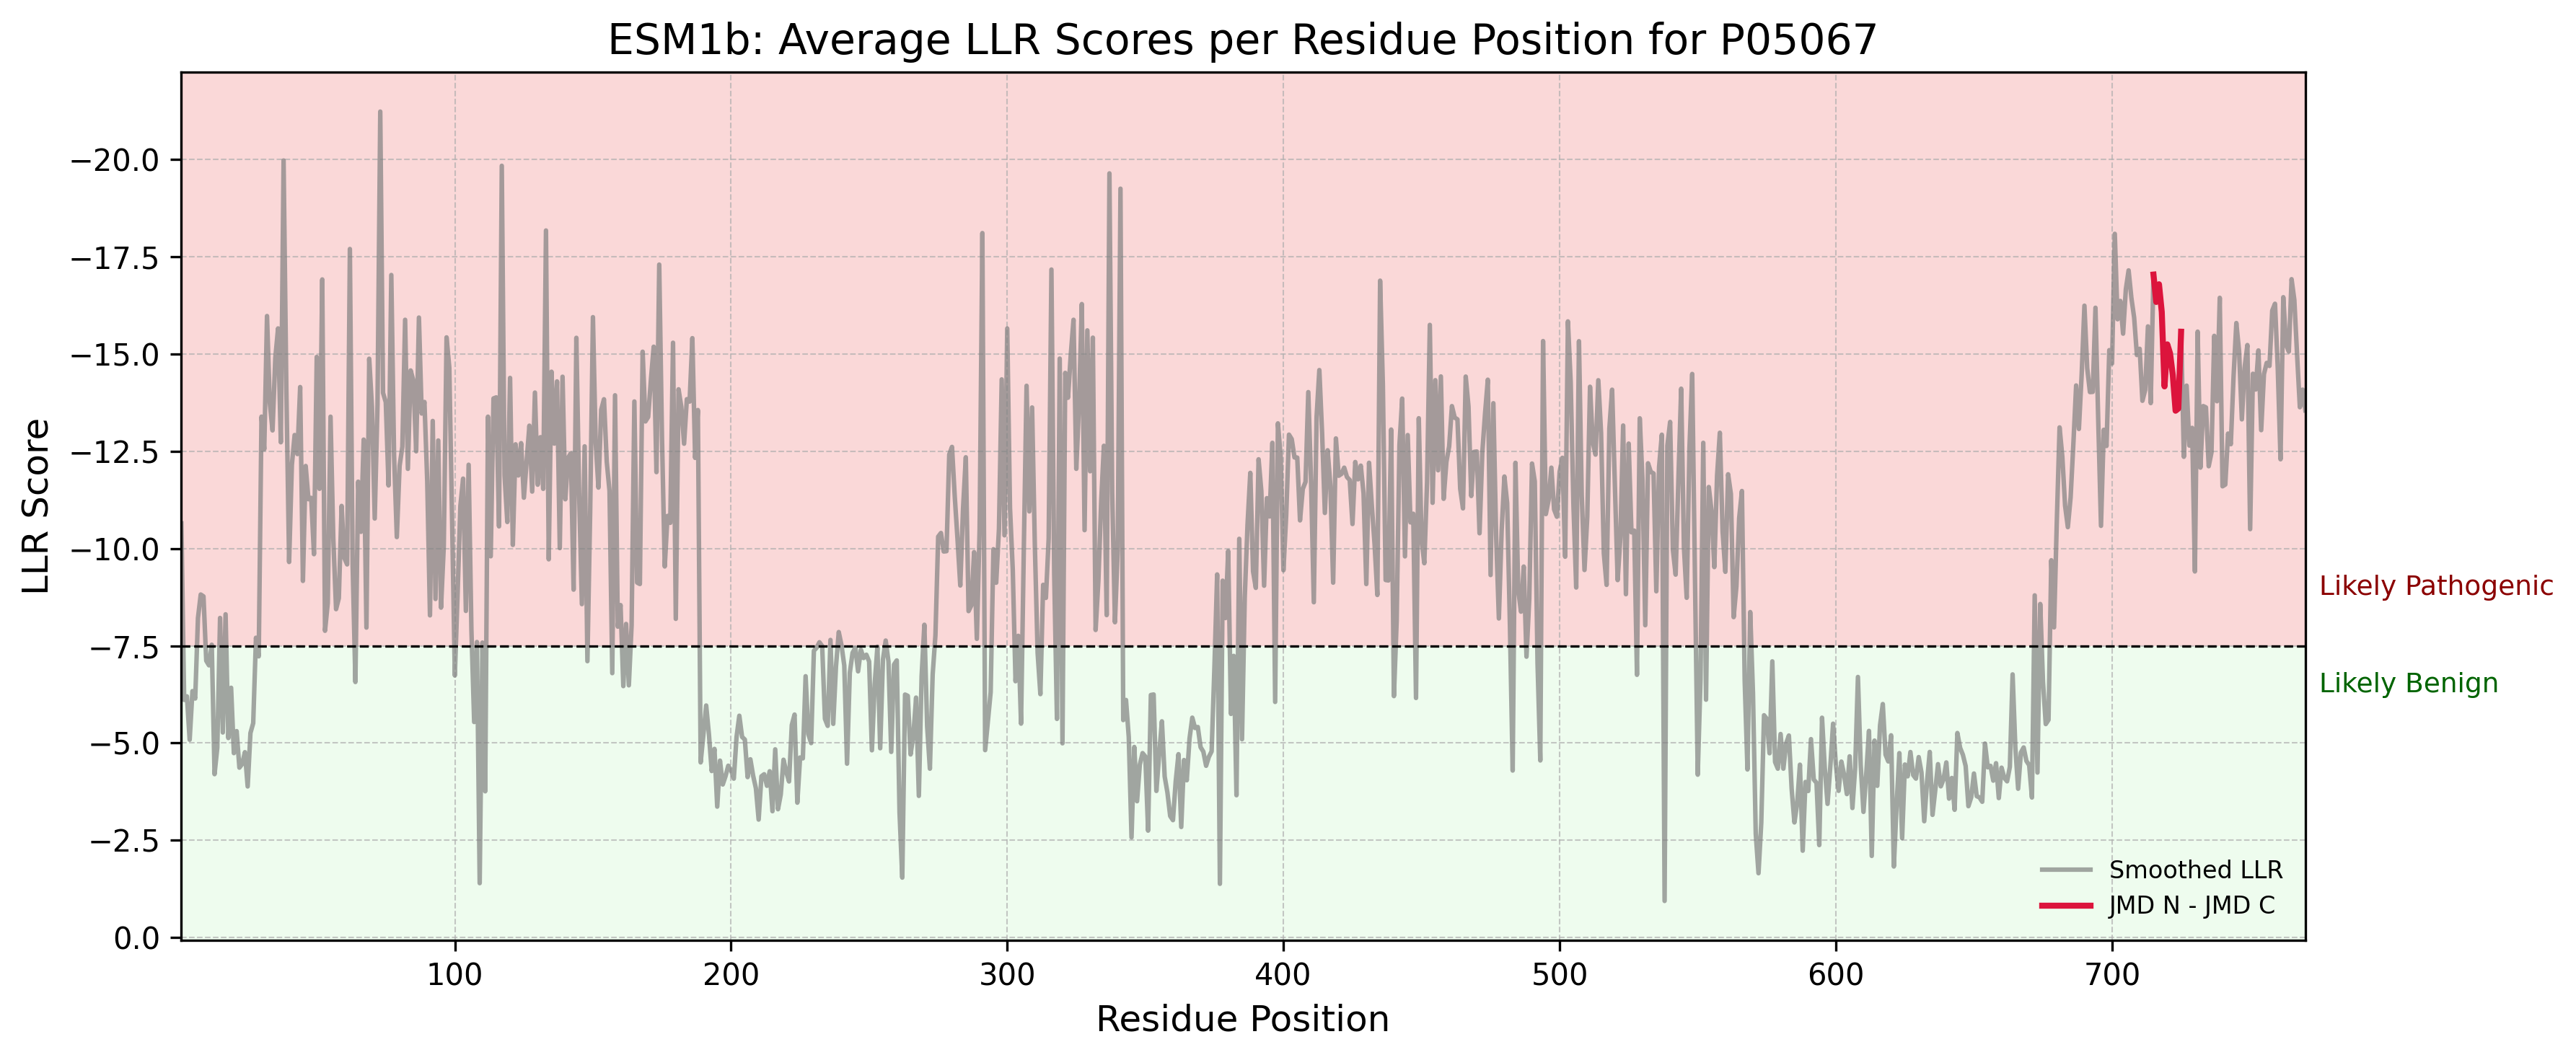

715 725


In [15]:
# Optional: smooth raw LLR scores
df['smoothed_LLR'] = df['LLR_score'].rolling(window=1, center=True).mean()

# Define highlight regions
broad_highlight_mask = (df['position'] >= highlight_start) & (df['position'] <= highlight_end)
broad_highlight_segment = df[broad_highlight_mask]

#tmd_mask = (df['position'] >= TMD_start) & (df['position'] <= TMD_end)
#tmd_segment = df[tmd_mask]

# Matplotlib style setup
mpl.rcParams.update({
    "font.size": 10,
    "font.family": "sans-serif",
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "legend.fontsize": 8,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Create plot
plt.figure(figsize=(12, 5), dpi=300)

# Base line: Raw smoothed LLR
plt.plot(
    df['position'],
    df['smoothed_LLR'],
    color='gray',
    alpha=0.7,
    linewidth=1.5,
    label='Smoothed LLR'
)

# Broad region (green)
plt.plot(
    broad_highlight_segment['position'],
    broad_highlight_segment['smoothed_LLR'],
    color='crimson', #'#29AB87'
    linewidth=2,
    label='JMD N - JMD C'
)

# TMD (red)
#plt.plot(
    #tmd_segment['position'],
    #tmd_segment['smoothed_LLR'],
    #color='crimson',
    #linewidth=2.5,
    #label='TMD'
#)

# Axes and title
plt.xlabel('Residue Position')
plt.ylabel('LLR Score')
plt.title(f'ESM1b: Average LLR Scores per Residue Position for {entry}')

# Invert y-axis so that more negative scores appear at the top
plt.gca().invert_yaxis()


# Shaded background for LLR categories
plt.axhspan(df['smoothed_LLR'].min() - 1, -7.5, facecolor='lightcoral', alpha=0.3)  # more negative = higher
plt.axhspan(-7.5, df['smoothed_LLR'].max() + 2, facecolor='lightgreen', alpha=0.15)

# Horizontal threshold line at -7.5
plt.axhline(y=-7.5, color='black', linestyle='--', linewidth=0.8)

# Annotations
x_annot = df['position'].max() + 5
plt.text(x_annot, -9, 'Likely Pathogenic', color='darkred', fontsize=9, va='center')
plt.text(x_annot, -6.5, 'Likely Benign', color='darkgreen', fontsize=9, va='center')

# Grid, x-limits, legend (note: no ylim)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(df['position'].min(), df['position'].max())
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()

# Save plot
output_dir = '/Users/doma/Documents/Bachelor_Arbeit/Code/1.Task_BA'
filename = f'{entry}_LLR_Scores_plot.png'
save_path = os.path.join(output_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()
print(highlight_start, highlight_end)

In [16]:
highlight_means = {}

for entry, df in protein_data.items():
    df = df.copy()
    df['position'] = df['position'].astype(int)
    
    row = df_predicted_filtered.loc[df_predicted_filtered['entry'] == entry].squeeze()
    
    # TMD region
    TMD_start = row['len_signal_pep'] + row['len_top_n'] + 1
    TMD_end = TMD_start + row['len_tmd'] - 1
    
    # JMD lengths
    len_jmd_n = len(str(row['jmd_n'])) 
    len_jmd_c = len(str(row['jmd_c'])) 
    
    highlight_start = TMD_start - len_jmd_n
    highlight_end = TMD_end + len_jmd_c

    # normalize
    #llr_min = df['LLR_score'].min()
    #llr_max = df['LLR_score'].max()
    #df['LLR_score_normalized'] = 1 - (df['LLR_score'] - llr_min) / (llr_max - llr_min)


    # Compute mean in highlight range
    region = df[(df['position'] >= highlight_start) & (df['position'] <= highlight_end)]
    highlight_means[entry] = region['LLR_score'].mean()


In [17]:
highlight_meansss = {}

for entry, df in protein_data.items():
    df = df.copy()
    df['position'] = df['position'].astype(int)

    row = df_predicted_filtered.loc[df_predicted_filtered['entry'] == entry].squeeze()

   # for the cleavage region part experimenting
    highlight_start = row['len_signal_pep'] + row['len_top_n'] + 14
    highlight_end = highlight_start + 10
        
    #llr_min = df['LLR_score'].min()
    #llr_max = df['LLR_score'].max()
    #df['LLR_score_normalized'] = 1 - (df['LLR_score'] - llr_min) / (llr_max - llr_min)


    # Extract region
    region = df[(df['position'] >= highlight_start) & (df['position'] <= highlight_end)]

    # Store both raw and normalized means
    highlight_meansss[entry] = {
        #'avg_tmd_llr': region['LLR_score_normalized'].mean(),
        'avg_tmd_llr_raw': region['LLR_score'].mean()
    }

# Convert to DataFrame
average_llr_pathogenicity = pd.DataFrame.from_dict(highlight_meansss, orient='index')
average_llr_pathogenicity = average_llr_pathogenicity.reset_index().rename(columns={'index': 'entry'})

# Merge with metadata
average_llr_pathogenicity = average_llr_pathogenicity.merge(
    df_predicted_filtered[['entry', 'pred_class', 'PRED_MEAN [%]']],
    on='entry',
    how='left'
)

# Save the result
average_llr_pathogenicity.to_csv('/Users/doma/Documents/Bachelor_Arbeit/Code/1.Task_BA/Average_cleavage_region_LLR_EMS_LMMAAAAAOO.csv', index=False)

# Later to not overwrite the data: 
# save_csv_no_overwrite(average_llr_pathogenicity, '/Users/doma/Documents/Bachelor_Arbeit/Code/1.Task_BA/Average_cleavage_region_LLR_EMS_LMMAAAAAOO.csv')


In [18]:
average_llr_pathogenicity.head(15)

,entry,avg_tmd_llr_raw,pred_class,PRED_MEAN [%]
0,P16150,-10.343882,HC substrate,95.22
1,P28827,-14.079473,HC substrate,94.79
2,P10586,-12.606491,HC substrate,94.64
3,Q06418,-7.591450,HC substrate,94.49
4,P54764,-11.302436,HC substrate,94.39
5,P19022,-12.728232,HC substrate,94.37
6,O60469,-10.168568,HC substrate,94.34
7,Q14118,-11.036727,HC substrate,94.24
8,P09603,-8.988359,HC substrate,94.07
9,P23468,-15.338645,HC substrate,93.84


In [19]:
highlight_means

{'P16150': -8.849636046511629,
 'P28827': -13.56363095238095,
 'P10586': -10.520925609756096,
 'Q06418': -7.461548780487805,
 'P54764': -10.34202261904762,
 'P19022': -12.882778048780487,
 'O60469': -10.014696341463413,
 'Q14118': -9.616292391304347,
 'P09603': -7.1080292682926824,
 'P23468': -12.490066666666664,
 'Q9UM47': -9.448770731707318,
 'Q04721': -8.66404024390244,
 'P05067': -14.64698780487805,
 'P12830': -12.508623170731708,
 'Q06481': -11.919576136363638,
 'O14522': -10.935279268292684,
 'P08581': -8.78965,
 'P22223': -7.59255,
 'Q86VB7': -5.9372792682926825,
 'Q15303': -11.59610681818182,
 'Q15223': -7.273321951219513,
 'Q9HCJ2': -11.026443902439025,
 'Q8TD84': -7.366659756097561,
 'P04439': -11.509142045454546,
 'Q9NZR2': -7.470784883720929,
 'P16070': -13.391069512195124,
 'P17342': -9.274632558139537,
 'Q86YL7': -11.20798536585366,
 'P16422': -9.208219767441859,
 'P01893': -12.056598863636365,
 'P30530': -11.117837804878048,
 'P30511': -11.081610227272726,
 'P55283': -11

### Starting again to compute mean of the region of interest (40AA)

In [20]:
# Choose a protein ID
entry2 = 'P05067'  # Or any other protein ID from your dictionary

# Get the DataFrame for the protein
df2 = protein_data[entry].copy()

In [21]:
# Get the row corresponding to the entry
row = df_predicted_filtered.loc[df_predicted_filtered['entry'] == entry2].squeeze()

# Compute TMD region
TMD_start = row['len_signal_pep'] + row['len_top_n'] + 1
TMD_end = TMD_start + row['len_tmd'] - 1

# Compute JMD-n and JMD-c regions length = probably always just 10 residues
len_jmd_n = len(str(row['jmd_n'])) 
len_jmd_c = len(str(row['jmd_c'])) 

# Compute JMD-N TMD JMD-C regions
highlight_start = TMD_start - len_jmd_n
highlight_end = TMD_end + len_jmd_c

print(f"Highlight range: {highlight_start}-{highlight_end}")


Highlight range: 692-732


In [22]:
# method for computing highlighted region

def compute_highlight_range(entry, df_predicted_filtered):
    """
    Function to compute the highlight range (TMD + JMD regions) for a specific protein entry.
    
    Parameters:
    - entry: str, the protein entry (e.g., 'P05067')
    - df_predicted_filtered: DataFrame, the dataframe containing protein data (with 'entry', 'len_signal_pep', 
                               'len_top_n', 'len_tmd', 'jmd_n', and 'jmd_c' columns).
    
    Returns:
    - highlight_start: int, start position of the highlight region (including TMD and JMD-n)
    - highlight_end: int, end position of the highlight region (including TMD and JMD-c)
    """
    
    # Get the row corresponding to the entry
    row = df_predicted_filtered.loc[df_predicted_filtered['entry'] == entry].squeeze()

    # Compute TMD region
    TMD_start = row['len_signal_pep'] + row['len_top_n'] + 1
    TMD_end = TMD_start + row['len_tmd'] - 1

    # Compute JMD-n and JMD-c regions length
    len_jmd_n = len(str(row['jmd_n']))
    len_jmd_c = len(str(row['jmd_c']))

    # Compute JMD-N TMD JMD-C region
    highlight_start = TMD_start - len_jmd_n
    highlight_end = TMD_end + len_jmd_c

    # Print highlight range for reference
    #print(f"Highlight range for {entry}: {highlight_start}-{highlight_end}")

    return highlight_start, highlight_end


In [23]:
# Step 3: Compute the raw average LLR score in the highlighted region

# Boolean mask for the highlighted region (between highlight_start and highlight_end)
highlight_mask = (df['position'] >= highlight_start) & (df['position'] <= highlight_end)

# Extract the raw LLR scores in this highlighted region
highlighted_data = df.loc[highlight_mask, 'LLR_score']

# Compute the raw average of the LLR scores in the highlighted region
highlighted_avg = highlighted_data.mean()

print(f"Average LLR score for the highlighted region ({highlight_start}-{highlight_end}): {highlighted_avg}")

Average LLR score for the highlighted region (692-732): nan


In [24]:
def compute_average_LLR(entry, df, highlight_start, highlight_end):
    # Boolean mask for the highlighted region (between highlight_start and highlight_end)
    highlight_mask = (df['position'] >= highlight_start) & (df['position'] <= highlight_end)

    # Extract the raw LLR scores in this highlighted region
    highlighted_data = df.loc[highlight_mask, 'LLR_score']

    # Compute the raw average of the LLR scores in the highlighted region
    highlighted_avg = highlighted_data.mean()

    return highlighted_avg


#### Now creating a loop for the above mean calculation

In [25]:
# Dictionary to store the computed mean LLR scores for each protein
mean_LLR_scores = {}


for entry in df_predicted_filtered['entry']:
    
    # Get the DataFrame for the protein - protein_data = all computed mean LLR scores for each residue of every protein as dictionary
    df2 = protein_data[entry].copy()

    # compute the transmembrane region = jmdn + tmd + jmdc
    highlight_start, highlight_end = compute_highlight_range(entry, df_predicted_filtered)

    #
    mean_region_protein = compute_average_LLR(entry, df2, highlight_start, highlight_end)

    # Store the computed value in the dictionary with the entry as the key
    mean_LLR_scores[entry] = mean_region_protein


mean_LLR_scores

{'P16150': -8.849636046511629,
 'P28827': -13.56363095238095,
 'P10586': -10.520925609756096,
 'Q06418': -7.461548780487805,
 'P54764': -10.34202261904762,
 'P19022': -12.882778048780487,
 'O60469': -10.014696341463413,
 'Q14118': -9.616292391304347,
 'P09603': -7.1080292682926824,
 'P23468': -12.490066666666664,
 'Q9UM47': -9.448770731707318,
 'Q04721': -8.66404024390244,
 'P05067': -14.64698780487805,
 'P12830': -12.508623170731708,
 'Q06481': -11.919576136363638,
 'O14522': -10.935279268292684,
 'P08581': -8.78965,
 'P22223': -7.59255,
 'Q86VB7': -5.9372792682926825,
 'Q15303': -11.59610681818182,
 'Q15223': -7.273321951219513,
 'Q9HCJ2': -11.026443902439025,
 'Q8TD84': -7.366659756097561,
 'P04439': -11.509142045454546,
 'Q9NZR2': -7.470784883720929,
 'P16070': -13.391069512195124,
 'P17342': -9.274632558139537,
 'Q86YL7': -11.20798536585366,
 'P16422': -9.208219767441859,
 'P01893': -12.056598863636365,
 'P30530': -11.117837804878048,
 'P30511': -11.081610227272726,
 'P55283': -11

#### now do the plotting of categories and their means

In [26]:
# Step 1: Create a new column in df_predicted_filtered to store the mean LLR score
df_predicted_filtered['mean_LLR_score'] = df_predicted_filtered['entry'].map(mean_LLR_scores)

# Step 2: Group by 'pred_class' and compute the mean LLR score for each class
category_avg_llr = -df_predicted_filtered.groupby('pred_class')['mean_LLR_score'].mean()

df_predicted_filtered.head(15)

,entry,name,gene_name,PRED_MEAN [%],PRED_STD [%],organism,dataset,class,pred_class,new_hc_substrate,...,len_signal_pep,len_top_n,len_tmd,len_top_c,jmd_n,tmd,jmd_c,tmd_AN,len_tmd_AN,mean_LLR_score
0,P16150,LEUK_HUMAN,SPN,95.22,2.02,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,19,234,23,124,PFRNPDENSR,GMLPVAVLVALLAVIVLVALLLL,WRRRQKRRTG,UP,23,-8.849636
1,P28827,PTPRM_HUMAN,PTPRM,94.79,2.09,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,20,722,22,688,PEKQTDHTVK,IAGVIAGILLFVIIFLGVVLVM,KKRKLAKKRK,UP,22,-13.563631
2,P10586,PTPRF_HUMAN,PTPRF,94.64,2.03,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,29,1234,21,623,QQQEEPEMLW,VTGPVLAVILIILIVIAILLF,KRKRTHSPSS,UP,21,-10.520926
3,Q06418,TYRO3_HUMAN,TYRO3,94.49,2.14,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,40,389,21,440,QGPPHSRTSW,VPVVLGVLTALVTAAALALIL,LRKRRKETRF,UP,21,-7.461549
4,P54764,EPHA4_HUMAN,EPHA4,94.39,2.26,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,19,528,22,417,RIIGDGANST,VLLVSVSGSVVLVVILIAAFVI,SRRRSKYSKA,UP,22,-10.342023
5,P19022,CADH2_HUMAN,CDH2,94.37,2.47,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,25,699,21,161,IVGAGLGTGA,IIAILLCIIILLILVLMFVVW,MKRRDKERQA,UP,21,-12.882778
6,O60469,DSCAM_HUMAN,DSCAM,94.34,1.96,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,17,1578,21,396,GLTTNEGLKM,LVTISCILVGVLLLFVLLLVV,RRRRREQRLK,UP,21,-10.014696
7,Q14118,DAG1_HUMAN,DAG1,94.24,2.13,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,29,720,26,120,DPEKSSEDDV,YLHTVIPAVVVAAILLIAGIIAMICY,RKKRKGKLTL,UP,26,-9.616292
8,P09603,CSF1_HUMAN,CSF1,94.07,2.42,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,32,464,21,37,GSFSPQLQES,VFHLLVPSVILVLLAVGGLLF,YRWRRRSHQE,UP,21,-7.108029
9,P23468,PTPRD_HUMAN,PTPRD,93.84,2.28,HUMAN,NaN,SS_TYPE1,HC substrate,1,...,20,1245,25,622,DPQPITDEEE,GLIWVVGPVLAVVFIICIVIAILLY,KRKRAESDSR,UP,25,-12.490067


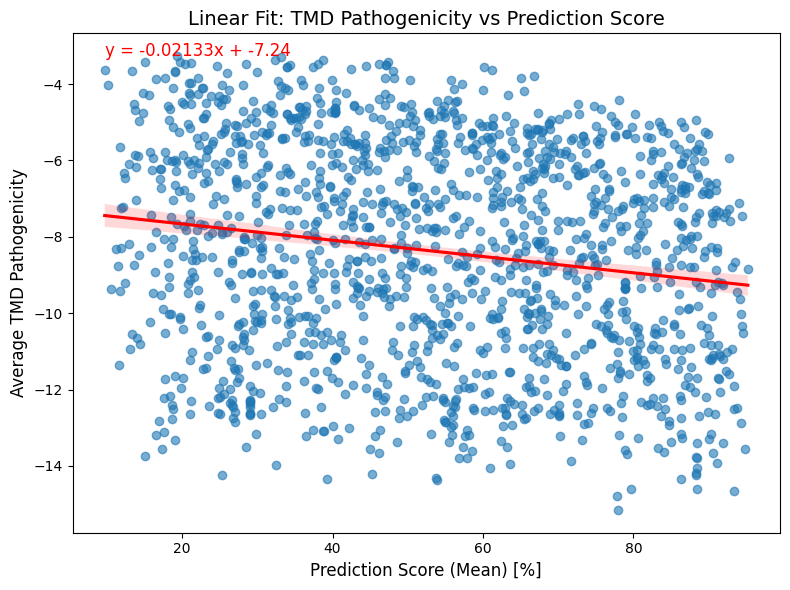

In [27]:
x2 = df_predicted_filtered["PRED_MEAN [%]"]
y2 = df_predicted_filtered["mean_LLR_score"]


# Linear regression
slope, intercept = np.polyfit(x2, y2, 1)
regression_eq = f"y = {slope:.5f}x + {intercept:.2f}"

# Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=x2, y=y2, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.xlabel("Prediction Score (Mean) [%]")
plt.ylabel("Average TMD Pathogenicity")
plt.title("Linear Fit: TMD Pathogenicity vs Prediction Score")
plt.text(x2.min(), y2.max(), regression_eq, fontsize=12, color="red")  # equation on plot
plt.tight_layout()
plt.show()

In [28]:
# Compute means, standard deviation, and variance of each category
# Create a DataFrame from the mean dictionary
mean_df = pd.DataFrame(list(mean_LLR_scores.items()), columns=['entry', 'mean_LLR'])


# Merge with class info
merged_df = mean_df.merge(df_predicted_filtered[['entry', 'pred_class']], on='entry')

# Compute mean, std, and variance per class
summary_stats = merged_df.groupby('pred_class')['mean_LLR'].agg(['mean', 'std', 'var'])

# Compute coefficient of variation (CV) for each group
summary_stats['cv'] = (summary_stats['std'] / summary_stats['mean']) * 100

# Add the number of data points (size) per class
summary_stats['n'] = merged_df.groupby('pred_class')['mean_LLR'].size()

print(summary_stats)

### result ==> use Welch's t-test as groups 
print(mean_df)

                      mean       std       var         cv    n
pred_class                                                    
HC non-substrate -7.758842  2.889052  8.346622 -37.235607   98
HC substrate     -9.207545  2.587940  6.697435 -28.106735  250
LC non-substrate -7.929049  2.772605  7.687340 -34.967692  594
LC substrate     -8.585390  2.723984  7.420090 -31.728135  586
           entry   mean_LLR
0         P16150  -8.849636
1         P28827 -13.563631
2         P10586 -10.520926
3         Q06418  -7.461549
4         P54764 -10.342023
...          ...        ...
1523      Q9NR96  -8.762260
1524      Q96JJ7  -8.306220
1525      Q15399  -9.366504
1526  A0A0D9SF12  -4.017104
1527      Q9BZ97  -3.633411

[1528 rows x 2 columns]


Unique categories in 'pred_class': ['HC substrate' 'LC substrate' 'LC non-substrate' 'HC non-substrate']
T-statistic: -4.543, P-value: 0.000008 between HC-Substrate and HC non-substrate


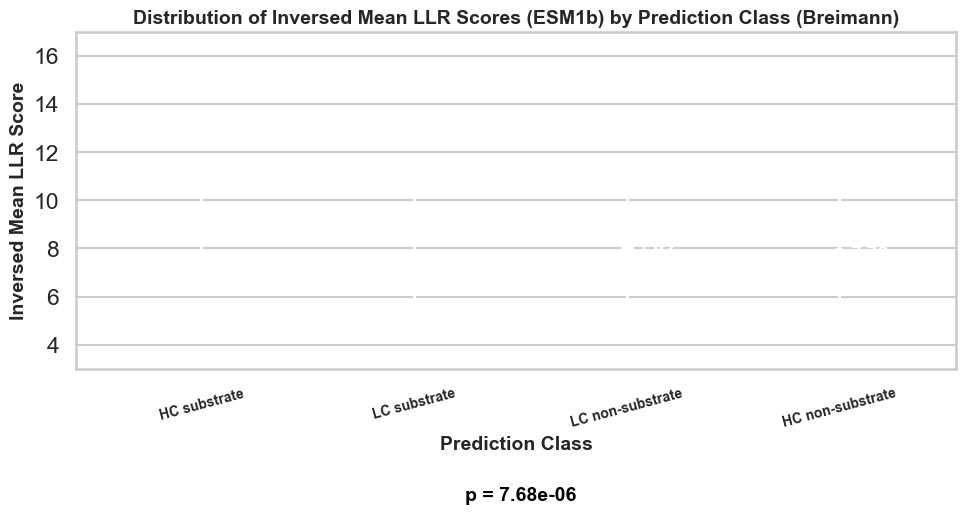

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Set the seaborn style
sns.set(style="whitegrid", context="talk")

# Define the correct order for the categories
order = ['HC substrate', 'LC substrate', 'LC non-substrate', 'HC non-substrate']

# Ensure there are no NaN values in key columns
df_predicted_filtered = df_predicted_filtered.dropna(subset=['pred_class', 'mean_LLR_score'])

# Check the unique categories in 'pred_class'
print("Unique categories in 'pred_class':", df_predicted_filtered['pred_class'].unique())

plt.figure(figsize=(10, 6))

# Violin plot with pred_class as both x
sns.violinplot(
    data=df_predicted_filtered,
    x='pred_class',
    y='mean_LLR_score',
    inner=None,
    cut=0,
    linewidth=1.2,
    order=order  # Ensure the classes appear in the correct order
)

# Swarm plot to show individual points within the violin
sns.swarmplot(
    data=df_predicted_filtered,
    x='pred_class',
    y='mean_LLR_score',
    color='black',
    size=4,
    alpha=0.5,  # Make points more transparent
    dodge=True,  # Prevent overlap between points
    order=order  # Ensure the classes appear in the correct order
)

# Compute means, standard deviation, and number of data points per category
summary_stats = merged_df.groupby('pred_class')['mean_LLR'].agg(['mean', 'std', 'size'])

# Reorder the summary statistics according to the desired order
summary_stats = summary_stats.loc[order]

# Invert mean values for the plot
summary_stats['mean'] = -summary_stats['mean']  # Invert mean values

# Add standard deviation and mean markers to the plot
for idx, category in enumerate(summary_stats.index):
    # Get the category mean and standard deviation
    mean_value = summary_stats.loc[category, 'mean']
    std_value = summary_stats.loc[category, 'std']
    
    # Plot mean and standard deviation (adjusted to not be buried under data points)
    plt.errorbar(
        idx, mean_value, yerr=std_value, fmt='o', color='white', capsize=10, 
        label=f'{category} (mean ± std)', zorder=3  # Placing it above the points
    )
    
    # Annotate the mean on top of the violin plot
    plt.text(
        idx + 0.05,                  # Slightly right of the point
        mean_value,                  # Aligned with the mean
        f'{mean_value:.2f}',         # Format to 2 decimals
        ha='left',                   # Align text to left of anchor point
        va='center',                 # Vertically center with the mean
        fontsize=14,
        color='white',
        fontweight='bold',           # Bold font
        zorder=4
    )

# Perform Welch's t-test for 'HC substrate' and 'HC non-substrate' comparison
group1 = merged_df[merged_df['pred_class'] == 'HC substrate']['mean_LLR']
group2 = merged_df[merged_df['pred_class'] == 'HC non-substrate']['mean_LLR']
t_stat, p_val = ttest_ind(group1, group2, equal_var=True)  # Welch's t-test
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.6f} between HC-Substrate and HC non-substrate")

# If p-value is below the threshold, add a significance line and p-value annotation
if p_val < 0.05:
    # Add a significance bar (line)
    plt.plot([0, 3], [max(df_predicted_filtered['mean_LLR_score']) + 0.5] * 2, color='black', lw=1.5)

    # Annotate the p-value at the top of the significance bar
    plt.text(
        1.5,
        max(df_predicted_filtered['mean_LLR_score']) + 0.6,
        f'p = {p_val:.2e}',  # e.g., p = 3.00e-05
        ha='center',
        va='bottom',
        fontsize=14,
        color='black',
        fontweight='bold'
    )
    # Add vertical lines (whiskers) going down from the significance bar to the respective categories
    plt.plot([0, 0], [max(df_predicted_filtered['mean_LLR_score']) + 0.5, max(df_predicted_filtered['mean_LLR_score']) + 0.0], color='black', lw=1.5)
    plt.plot([3, 3], [max(df_predicted_filtered['mean_LLR_score']) + 0.5, max(df_predicted_filtered['mean_LLR_score']) + 0.0], color='black', lw=1.5)

# Adjust y-axis limits to show the plot up to 18
plt.ylim(3, 17)

# Final plot touches
plt.title("Distribution of Inversed Mean LLR Scores (ESM1b) by Prediction Class (Breimann)", fontsize=14, fontweight='bold')
plt.xlabel("Prediction Class", fontsize=14, fontweight='bold')
plt.ylabel("Inversed Mean LLR Score", fontsize=14, fontweight='bold')
plt.xticks(rotation=15, fontsize=10, fontweight='bold')
plt.tight_layout()

# Save the figure
#plt.savefig("mean_llr_scores_by_class_violinplot.png", dpi=300, bbox_inches='tight')  # You can change the filename/format

plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="white", context="notebook", font_scale=1.2)

# Ensure correct category order
order = ['HC substrate', 'LC substrate', 'LC non-substrate', 'HC non-substrate']
df['pred_class'] = pd.Categorical(df['pred_class'], categories=order, ordered=True)

# Use only mean and std columns from summary_stats
stats_df = summary_stats[['mean', 'std']].copy()

# Plot setup
plt.figure(figsize=(14, 18))

# Violin plot
sns.violinplot(
    x='pred_class', 
    y='mean_LLR', 
    data=df, 
    inner=None, 
    order=order, 
    palette="muted", 
    linewidth=1.2,
    legend=False
)

# Swarm plot
sns.swarmplot(
    x='pred_class', 
    y='mean_LLR', 
    data=df, 
    color='black', 
    alpha=0.6,
    size=5, 
    order=order,
    edgecolor='0.5',
    linewidth=0.5
)

# Add mean ± std error bars and text labels
for i, cls in enumerate(order):
    mean = stats_df.loc[cls, 'mean']
    std = stats_df.loc[cls, 'std']
    
    # Error bar (mean ± std)
    plt.errorbar(
        i, mean, yerr=std, fmt='o', color='white',
        capsize=5, lw=2, markersize=8, zorder=10
    )
    
    # Mean label
    plt.text(
        i + 0.05, mean, f"{mean:.2f}", ha='left', va='center',
        fontsize=16, color='white', weight='bold', zorder=11
    )

# Titles and labels
plt.title('Mean LLR Score Distribution by Prediction Class', fontsize=18, weight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Mean LLR Score', fontsize=14)
plt.xticks(rotation=0, fontsize=13, weight='bold')
plt.yticks(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust y-axis to fit negative values only and invert
ymin = df['mean_LLR'].min() - 1
ymax = df['mean_LLR'].max() + 1
plt.ylim(ymax, ymin)  # Inverted: less negative (closer to 0) on top

plt.tight_layout()

# Save and show
#plt.savefig('mean_llr_violinplot_with_means.png', dpi=300, bbox_inches='tight')
plt.show()


KeyError: 'pred_class'

T-statistic: -6.137, P-value: 0.000000 between Substrate and Non-substrate


/var/folders/kw/jxgfh6fx7_v_5_3hk6sqf3nw0000gn/T/ipykernel_11503/4200909475.py:113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


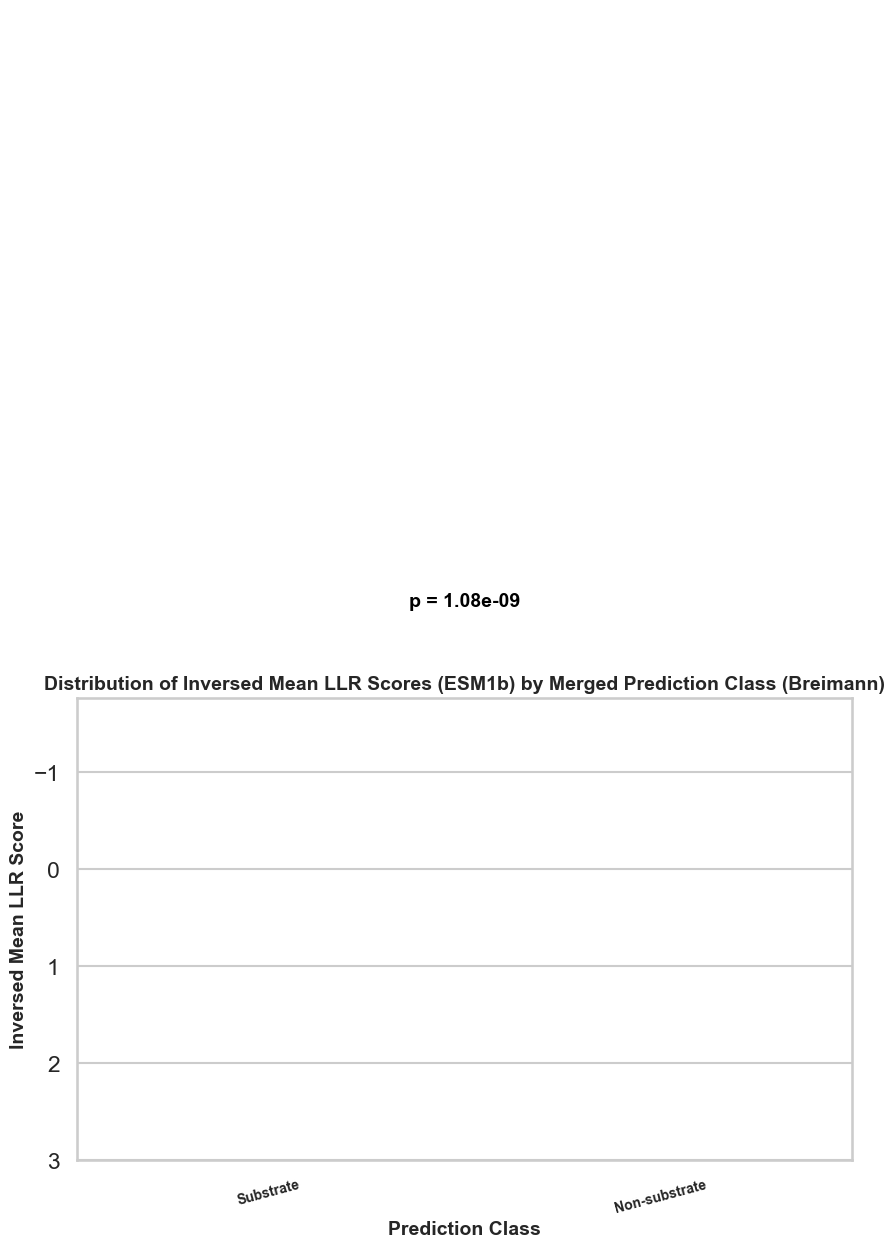

In [31]:
# Set the seaborn style
sns.set(style="whitegrid", context="talk")

# Recode the 'pred_class' to combine the classes
df_predicted_filtered['pred_class_merged'] = df_predicted_filtered['pred_class'].replace({
    'HC substrate': 'Substrate', 
    'LC substrate': 'Substrate',
    'LC non-substrate': 'Non-substrate',
    'HC non-substrate': 'Non-substrate'
})

# Define the new order for the categories
order = ['Substrate', 'Non-substrate']

plt.figure(figsize=(10, 6))

# Violin plot with the merged pred_class as both x and hue
sns.violinplot(
    data=df_predicted_filtered,
    x='pred_class_merged',
    y='mean_LLR_score',
    hue='pred_class_merged',
    palette='Set2',
    inner=None,
    cut=0,
    linewidth=1.2,
    legend=False,  # Hide redundant legend
    order=order  # Ensure the classes appear in the correct order
)

# Swarm plot to show individual points within the violin
sns.swarmplot(
    data=df_predicted_filtered,
    x='pred_class_merged',
    y='mean_LLR_score',
    color='black',
    size=4,
    alpha=0.8,
    order=order  # Ensure the classes appear in the correct order
)

# Compute means, standard deviation, and number of data points per category
summary_stats = df_predicted_filtered.groupby('pred_class_merged')['mean_LLR_score'].agg(['mean', 'std', 'size'])

# Reorder the summary statistics according to the desired order
summary_stats = summary_stats.loc[order]

# Add standard deviation and mean markers to the plot
for idx, category in enumerate(summary_stats.index):
    # Get the category mean and standard deviation
    mean_value = summary_stats.loc[category, 'mean']
    std_value = summary_stats.loc[category, 'std']
    n = summary_stats.loc[category, 'size']
    
    # Plot mean and standard deviation (adjusted to not be buried under data points)
    plt.errorbar(
        idx, mean_value, yerr=std_value, fmt='o', color='white', capsize=10, 
        label=f'{category} (mean ± std)', zorder=3  # Placing it above the points
    )
    
    # Annotate the mean on top of the violin plot
    plt.text(
    idx + 0.05,                  # Slightly right of the point
    mean_value,                  # Aligned with the mean
    f'{mean_value:.2f}',         # Format to 2 decimals
    ha='left',                   # Align text to left of anchor point
    va='center',                 # Vertically center with the mean
    fontsize=14,
    color='white',
    fontweight='bold',          # Bold font
    zorder=4
)

# Perform Welch's t-test for 'Substrate' vs 'Non-substrate' comparison
group1 = df_predicted_filtered[df_predicted_filtered['pred_class_merged'] == 'Substrate']['mean_LLR_score']
group2 = df_predicted_filtered[df_predicted_filtered['pred_class_merged'] == 'Non-substrate']['mean_LLR_score']
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.6f} between Substrate and Non-substrate")

# Significance threshold
p_threshold = 0.05

# If p-value is below the threshold, add a significance line and p-value annotation
if p_val < p_threshold:
    # Add a significance bar (line)
    plt.plot([0, 1], [max(df_predicted_filtered['mean_LLR_score']) + 0.5] * 2, color='black', lw=1.5)

    # Annotate the p-value at the top of the significance bar (scientific format + bold)
    plt.text(
        0.5,
        max(df_predicted_filtered['mean_LLR_score']) + 0.6,
        f'p = {p_val:.2e}',
        ha='center',
        va='bottom',
        fontsize=14,
        color='black',
        fontweight='bold'
    )

    # Add vertical lines (whiskers) from bar to category tops
    plt.plot([0, 0], [max(df_predicted_filtered['mean_LLR_score']) + 0.5, max(df_predicted_filtered['mean_LLR_score'])], color='black', lw=1.5)
    plt.plot([1, 1], [max(df_predicted_filtered['mean_LLR_score']) + 0.5, max(df_predicted_filtered['mean_LLR_score'])], color='black', lw=1.5)


# Adjust y-axis limits dynamically based on max value and annotation height
plt.ylim(3, max(df_predicted_filtered['mean_LLR_score']) + 1.5)

# Final plot touches (style matched to the first plot)
plt.title("Distribution of Inversed Mean LLR Scores (ESM1b) by Merged Prediction Class (Breimann)", fontsize=14, fontweight='bold')
plt.xlabel("Prediction Class", fontsize=14, fontweight='bold')
plt.ylabel("Inversed Mean LLR Score", fontsize=14, fontweight='bold')
plt.xticks(rotation=15, fontsize=10, fontweight='bold')
plt.tight_layout()

# Save the figure
#plt.savefig("mean_llr_scores_by_class_merged.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### AlphaMissense Part

## Epic